In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as mp
import numpy as np
from scipy.stats import linregress

#### Identifying control and treatment groups for our sub-topic
#### Based on changes in crimes per capita from 2005-2014 (given that we have 2 missing values in 2015: Cleveland, OH and Portland, OR)

- San Jose (contol group: low -> low)

- Boston (contol group: high -> high)

- Detroit (treatment group: high -> low)

- El-Paso (treatment group: low -> high)




In [3]:
final_DT = pd.read_csv("Final_Dataset.csv")

In [18]:
final_DT

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,...,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,state,0bed,1bed,2bed,3bed,4bed
0,2005,NM00101,Albuquerque,490631,4670,53,285,3182,1150,12,...,10.80,58.09,648.55,234.39,NM,470,553,699,1017,1224
1,2005,TX22001,Arlington,365380,2369,24,178,1399,768,12,...,6.57,48.72,382.89,210.19,TX,558,597,732,995,1125
2,2005,GAAPD00,Atlanta,430666,7213,90,223,4039,2861,12,...,20.90,51.78,937.85,664.32,GA,769,834,928,1150,1295
3,2005,TX22701,Austin,693019,3393,26,312,1873,1182,12,...,3.75,45.02,270.27,170.56,TX,656,747,912,1240,1435
4,2005,MDBPD00,Baltimore,641097,11248,269,162,6907,3910,12,...,41.96,25.27,1077.37,609.89,MD,662,750,900,1155,1428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2015,FL02902,Tampa,364383,2298,34,77,1516,671,12,...,9.33,21.13,416.05,184.15,FL,650,815,1022,1364,1633
551,2015,AZ01003,Tucson,529675,3472,31,422,1960,1059,12,...,5.85,79.67,370.04,199.93,AZ,522,652,877,1288,1532
552,2015,OK07205,Tulsa,401520,3628,55,365,2354,854,12,...,13.70,90.90,586.27,212.69,OK,526,639,833,1130,1259
553,2015,DCMPD00,Washington,672228,8084,162,494,4024,3404,12,...,24.10,73.49,598.61,506.38,DC,1260,1328,1574,2107,2646


In [6]:
#Regression for violent_Crimes vs 0bed rent
x = final_DT['violent_crimes'].to_numpy()
y = final_DT['0bed'].to_numpy()

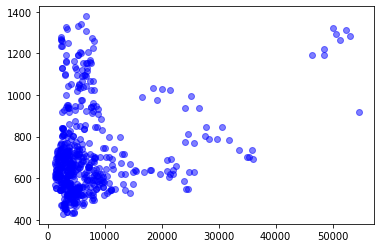

In [7]:
mp.scatter(x, y, c ="blue", alpha=0.5)

LinregressResult(slope=7.697780585963103, intercept=885.2251981166137, rvalue=0.22943157835943048, pvalue=4.604568307329378e-08, stderr=1.3886971850802077)

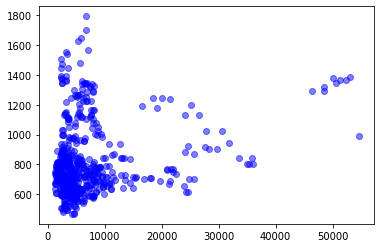

In [10]:
#Regression for violent_Crimes vs 1bed rent
x = final_DT['violent_crimes'].to_numpy()
y_1bed = final_DT['1bed'].to_numpy()

mp.scatter(x, y_1bed, c ="blue", alpha=0.5)
linregress(y_1bed,x)

In [7]:
 m,b = np.polyfit(x, y, 1)

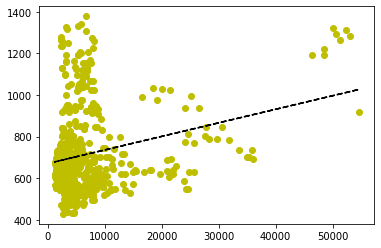

In [8]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(x, y, 'yo', x, poly1d_fn(x), '--k') 
linregress(y,x)

In [10]:
linregress(y,x)

LinregressResult(slope=9.976031209888902, intercept=54.05551916683726, rvalue=0.2549029030354175, pvalue=1.1116094687918272e-09, stderr=1.609281243651757)

In [11]:
#Regression for crimes_percapita vs 0bed rent
x_1 = final_DT['crimes_percapita'].to_numpy()
y_1 = final_DT['0bed'].to_numpy()

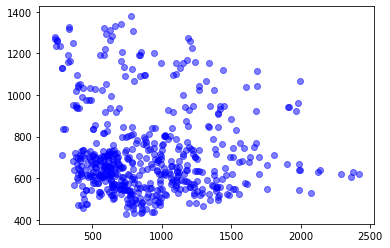

In [12]:
mp.scatter( x_1, y_1, c ="blue",alpha=0.5)

In [13]:
 m,b = np.polyfit(x_1, y_1, 1)

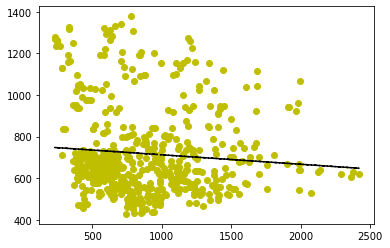

In [14]:
coef = np.polyfit(x_1,y_1,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(x_1,y_1, 'yo', x_1, poly1d_fn(x_1), '--k')

In [15]:
linregress(y_1,x_1)

LinregressResult(slope=-0.17330171209982612, intercept=1012.4019481924278, rvalue=-0.08874728680919705, pvalue=0.036603487200102626, stderr=0.08271193157654662)

In [19]:
import statsmodels.formula.api as smf

In [21]:
x_1 = final_DT['crimes_percapita'].to_numpy()
y_1_bed = final_DT['1bed'].to_numpy()

In [22]:
# 1bed ~ Crime_Per_Capita

linregress(y_1_bed,x_1)

LinregressResult(slope=-0.16878733626258058, intercept=1026.798046877418, rvalue=-0.10082373299573594, pvalue=0.01750376337349315, stderr=0.07082650805344126)

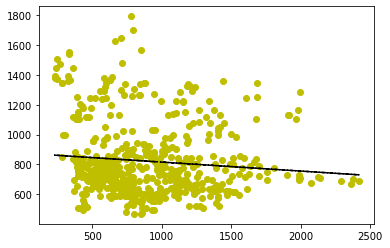

In [24]:
coef = np.polyfit(x_1,y_1_bed,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(x_1,y_1_bed, 'yo', x_1, poly1d_fn(x_1), '--k')

In [25]:
# 2bed ~ Crime_Per_Capita

x_1 = final_DT['crimes_percapita'].to_numpy()
y_2_bed = final_DT['2bed'].to_numpy()

In [26]:
linregress(y_2_bed,x_1)

LinregressResult(slope=-0.18635170059311196, intercept=1073.6409347296171, rvalue=-0.13535541490232364, pvalue=0.00139205229110374, stderr=0.058006931324165796)

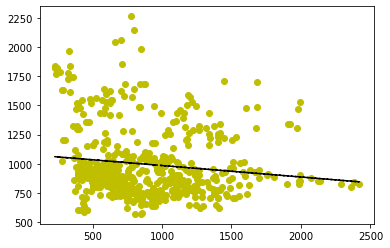

In [27]:
coef = np.polyfit(x_1,y_2_bed,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(x_1,y_2_bed, 'yo', x_1, poly1d_fn(x_1), '--k')

In [28]:
# 3bed ~ Crime_Per_Capita

x_1 = final_DT['crimes_percapita'].to_numpy()
y_3_bed = final_DT['3bed'].to_numpy()

In [29]:
linregress(y_3_bed,x_1)

LinregressResult(slope=-0.2225166269977379, intercept=1186.9422798278815, rvalue=-0.22655473659264574, pvalue=6.831269314891457e-08, stderr=0.04068038131171924)

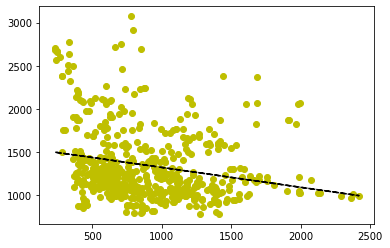

In [30]:
coef = np.polyfit(x_1,y_3_bed,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(x_1,y_3_bed, 'yo', x_1, poly1d_fn(x_1), '--k')

In [31]:
# 4bed ~ Crime_Per_Capita

x_1 = final_DT['crimes_percapita'].to_numpy()
y_4_bed = final_DT['4bed'].to_numpy()

In [32]:
linregress(y_4_bed,x_1)

LinregressResult(slope=-0.18376097721911622, intercept=1174.5485210682004, rvalue=-0.2256905964727738, pvalue=7.682761814942383e-08, stderr=0.033730669055761976)

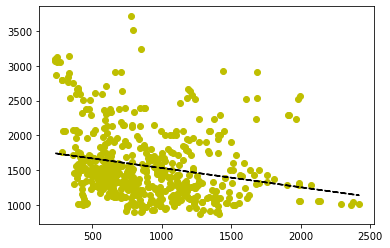

In [33]:
coef = np.polyfit(x_1,y_4_bed,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(x_1,y_4_bed, 'yo', x_1, poly1d_fn(x_1), '--k')

In [19]:
# Subsetting Detroit (contol: high->high)

Detroit_Data = final_DT[final_DT['agency_jurisdiction']=='Detroit']

In [20]:
Detroit_Crime_Per_Cap = Detroit_Data['crimes_percapita'].to_numpy()
Detroit_4_bed = Detroit_Data['4bed'].to_numpy()

In [21]:
linregress(Detroit_4_bed, Detroit_Crime_Per_Cap)

LinregressResult(slope=-1.12123155733482, intercept=3379.9480765180124, rvalue=-0.7059867588637505, pvalue=0.015188129951929865, stderr=0.3749287768201267)

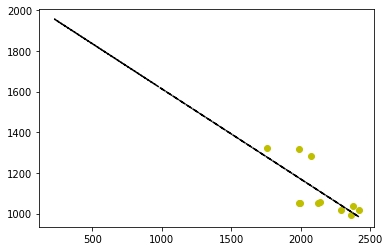

In [22]:
coef = np.polyfit(Detroit_Crime_Per_Cap, Detroit_4_bed,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(Detroit_Crime_Per_Cap,Detroit_4_bed, 'yo', x_1, poly1d_fn(x_1), '--k')

In [23]:
# Subsetting Honolulu (contol: low->low)
Honolulu_Data = final_DT[final_DT['agency_jurisdiction']=='Honolulu']

In [24]:
Honolulu_Data_Crime_Per_Cap = Honolulu_Data['crimes_percapita'].to_numpy()
Honolulu_Data_4_bed = Honolulu_Data['4bed'].to_numpy()

In [25]:
linregress(Honolulu_Data_4_bed, Honolulu_Data_Crime_Per_Cap)

LinregressResult(slope=-0.039248510829123416, intercept=369.23896624223283, rvalue=-0.7595894349992026, pvalue=0.006685283206863866, stderr=0.01120225515598723)

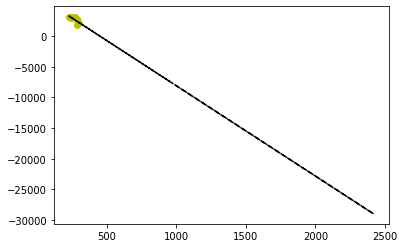

In [26]:
coef = np.polyfit(Honolulu_Data_Crime_Per_Cap, Honolulu_Data_4_bed,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

mp.plot(Honolulu_Data_Crime_Per_Cap, Honolulu_Data_4_bed, 'yo', x_1, poly1d_fn(x_1), '--k')